In [1]:
from fastqaoa.indicator import get_indicator_base, get_indicator_interpolator
import numpy as np
import matplotlib.pyplot as plt

In [38]:
inter = get_indicator_interpolator(5, 2)

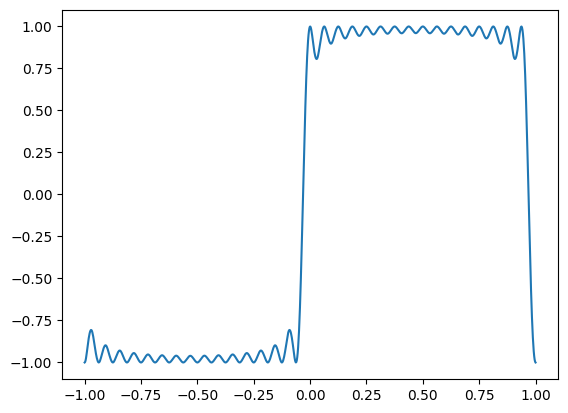

In [39]:
g = np.linspace(-1, 1, 1000)

plt.plot(g, inter(g))
# plt.yscale("log")

In [45]:
M = 5
g = np.linspace(-2 ** (M-1), 2 ** (M-1) -1, 1000)


z = np.arange(2 ** M)
f = np.exp(np.pi * 1j * (z > 2 ** (M-1))).real

res = np.sum(np.abs(1 - np.exp(2j * np.pi *(g[:, None] - z[None, :]))) ** 2 / np.abs(1 - np.exp(-2j * np.pi * (g[:, None] - z[None, :]) / 2 ** M)) ** 2 * f[None, :], axis=1) / 2 ** (2* M)

/var/folders/0y/wbcxhvy92xz19jsf8x4s17km0000gn/T/ipykernel_98223/3372903240.py:8: RuntimeWarning: invalid value encountered in divide
  res = np.sum(np.abs(1 - np.exp(2j * np.pi *(g[:, None] - z[None, :]))) ** 2 / np.abs(1 - np.exp(-2j * np.pi * (g[:, None] - z[None, :]) / 2 ** M)) ** 2 * f[None, :], axis=1) / 2 ** (2* M)


In [46]:
r1 = np.sum(np.abs(1 - np.exp(2j * np.pi *(g[:, None] - z[None, :]))) ** 2 / np.abs(1 - np.exp(-2j * np.pi * (g[:, None] - z[None, :]) / 2 ** M)) ** 2 * f[None, :], axis=1) / 2 ** M

/var/folders/0y/wbcxhvy92xz19jsf8x4s17km0000gn/T/ipykernel_98223/2433988808.py:1: RuntimeWarning: invalid value encountered in divide
  r1 = np.sum(np.abs(1 - np.exp(2j * np.pi *(g[:, None] - z[None, :]))) ** 2 / np.abs(1 - np.exp(-2j * np.pi * (g[:, None] - z[None, :]) / 2 ** M)) ** 2 * f[None, :], axis=1) / 2 ** M


In [47]:
psi_l = np.sum(np.exp(2j * np.pi / 2 ** M * (z[:, None, None] - g[None, :, None]) * z[None, None, :]), axis=-1) / 2 ** M

In [48]:
psi_r = psi_l * f[:, None]

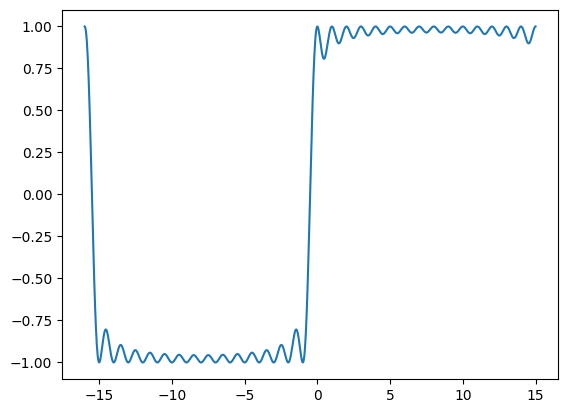

In [49]:
plt.plot(g, np.sum(psi_r * psi_l.conj(), axis=0).real)

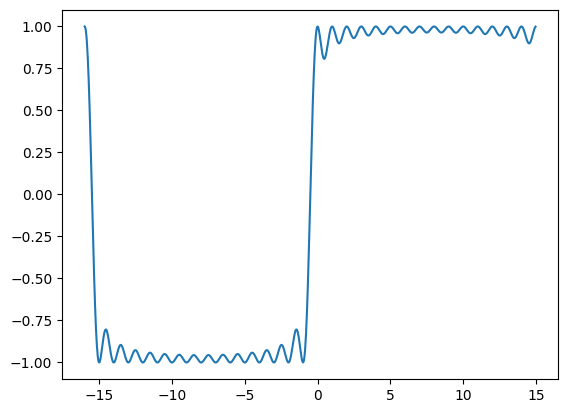

In [51]:
plt.plot(g, res)